In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df1 = pd.read_csv('Updated.csv')

In [3]:
df1['DCOILWTICO'] = df1['DCOILWTICO'].fillna(df1['DCOILWTICO'].mean())

In [4]:
df1.shape

(984, 26)

In [5]:
df1.columns

Index(['Unnamed: 0', 'LAT', 'LON', 'YEAR', 'MO', 'DY', 'PRECTOT', 'PS', 'RH2M',
       'QV2M', 'T2M', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'WS10M_RANGE',
       'WS50M_RANGE', 'WS50M', 'WS10M', 'Date', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', 'DCOILWTICO'],
      dtype='object')

In [6]:
df1.head()

,Unnamed: 0,LAT,LON,YEAR,MO,DY,PRECTOT,PS,RH2M,QV2M,...,WS50M,WS10M,Date,Open,High,Low,Close,Adj Close,Volume,DCOILWTICO
0,0,28.72461,77.15821,2015,1,1,0.01,99.15,42.18,0.004591,...,2.65,1.82,2015-01-01,152.000000,152.600006,146.000000,147.199997,122.386963,15984.0,52.72
1,1,28.72461,77.15821,2015,1,5,0.01,99.05,41.71,0.003888,...,8.78,5.61,2015-01-05,144.399994,148.850006,143.199997,143.550003,119.352272,25427.0,59.10
2,2,28.72461,77.15821,2015,1,6,0.00,98.88,50.84,0.004822,...,6.02,3.74,2015-01-06,143.350006,150.500000,139.100006,143.600006,119.393822,80909.0,60.24
3,3,28.72461,77.15821,2015,1,7,0.00,98.95,52.04,0.004727,...,5.19,3.25,2015-01-07,144.000000,146.649994,141.000000,144.199997,119.892700,21921.0,56.94
4,4,28.72461,77.15821,2015,1,12,0.00,99.22,33.01,0.003002,...,4.28,2.66,2015-01-12,156.500000,159.350006,151.149994,152.300003,126.627296,79161.0,40.58


In [7]:
#df3.insert(6, "Close", "Any")

In [8]:
#df3.insert(5, "prevDayPrice", "Any")

In [9]:
df1['Close']=df1['Close'].fillna(df1['Close'].mean())

In [10]:
#df3 = df1[['PRECTOT','PS','RH2M','QV2M','T2M']]

In [11]:
df3=df1[['PRECTOT', 'PS', 'RH2M', 'QV2M',
       'T2M', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'WS10M_RANGE', 'WS50M_RANGE',
       'WS50M', 'WS10M','DCOILWTICO']]

In [12]:
df3.insert(13, "prevDayPrice", "Any")

In [13]:
len(df3)

984

In [14]:
df3.head()

,PRECTOT,PS,RH2M,QV2M,T2M,T2M_MAX,T2M_MIN,T2M_RANGE,WS10M_RANGE,WS50M_RANGE,WS50M,WS10M,DCOILWTICO,prevDayPrice
0,0.01,99.15,42.18,0.004591,15.21,24.04,8.01,16.03,1.97,3.38,2.65,1.82,52.72,Any
1,0.01,99.05,41.71,0.003888,12.82,22.46,6.37,16.09,4.00,3.09,8.78,5.61,59.10,Any
2,0.00,98.88,50.84,0.004822,13.05,22.27,6.67,15.60,2.54,4.39,6.02,3.74,60.24,Any
3,0.00,98.95,52.04,0.004727,12.40,21.19,6.21,14.98,2.09,3.45,5.19,3.25,56.94,Any
4,0.00,99.22,33.01,0.003002,12.47,23.98,4.37,19.61,3.50,5.65,4.28,2.66,40.58,Any


In [15]:
df3.isnull().values.sum()

0

As today's price is depending upon yesterday's price

In [16]:
for i in range(len(df3)):
    if(i==0):
        df3['prevDayPrice'][i] = df1['Close'].mean()
    else:
        df3['prevDayPrice'][i] = df1['Close'][i-1]

C:\Users\SAHIL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SAHIL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\SAHIL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [17]:
X = df3
Y = df1[['Close']]

In [18]:
type(X)

pandas.core.frame.DataFrame

In [19]:
type(Y)

pandas.core.frame.DataFrame

In [21]:
#df

In [22]:
#feature_name = ['PRECTOT','PS','RH2M','QV2M','T2M']

In [23]:
# def normalize(df):
#     result = df.copy()
#     for feature_name in df.columns:
#         max_value = df[feature_name].max()
#         min_value = df[feature_name].min()
#         result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
#     return result

In [24]:
#X = np.asarray(X)

In [25]:
#X = X.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)

In [26]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.948917,0.999509,0.957178,0.999982,0.976009,0.977489,0.974557,0.992306,0.993864,0.993715,0.992784,0.994327,0.517962,0.366773
1,0.948917,0.999417,0.956746,0.999982,0.973709,0.975979,0.972970,0.992365,0.995879,0.993427,0.998860,0.998092,0.642522,0.552202
2,0.948907,0.999263,0.965139,0.999983,0.973930,0.975798,0.973260,0.991886,0.994430,0.994716,0.996125,0.996235,0.664779,0.492659
3,0.948907,0.999326,0.966243,0.999982,0.973305,0.974766,0.972815,0.991280,0.993983,0.993784,0.995302,0.995748,0.600351,0.493475
4,0.948907,0.999572,0.948748,0.999981,0.973372,0.977432,0.971035,0.995806,0.995383,0.995965,0.994400,0.995162,0.280945,0.503263


In [27]:
type(X)

pandas.core.frame.DataFrame

In [28]:
type(Y)

pandas.core.frame.DataFrame

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.10,random_state =4)

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg = reg.fit(X_train,y_train)

In [31]:
y_pred = reg.predict(X_test)

In [32]:
reg.score(X_test,y_test),reg.score(X_train,y_train)

(0.9119937372133612, 0.9419542449772857)

In [33]:
y_test

,Close
646,129.699997
846,149.949997
595,137.050003
747,116.150002
260,135.850006
...,...
507,163.000000
948,135.833198
238,122.699997
239,122.199997


In [34]:
import matplotlib.pyplot as plt

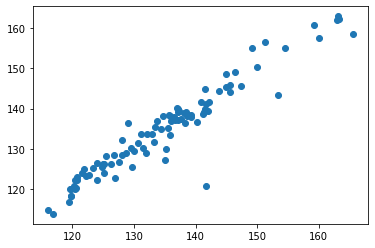

In [35]:
plt.scatter(y_test,y_pred)